<a href="https://colab.research.google.com/github/devLarissaRodrigues/WoMakersCode-DataAnalytics-DesafiosEmSquad/blob/etapa5/desafio2_completo_em_squad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Descrição do desafio intitulado: O perfil do Catálogo da Netflix
Esse desafio tem como objetivo responder algumas perguntas através da análise de dados, aprofundando o conhecimento em frequência e medidas. Os dados que deverão ser utilizado nesse script foram baixados do kaggle, e podem ser acessados através do link:  https://www.kaggle.com/code/shivamb/netflix-shows-and-movies-exploratory-analysis. Este conjunto de dados consiste na lista de filmes e suas respectivas e
suas informações.

**Variáveis:**


* show_id - id único do filme/série.
* title - título do filme ou série
* director - diretor do filme ou série
* cast - elenco do filme ou série
* country - país do filme ou série
* date_added - data que foi adicionado no Netflix
* reading score - ano de lançamento original do filme
* rating - classificação da televisão
* duration - duração total do filme ou série.
* listed_in - categoria ou gênero do filme ou série.
* description -descrição do filme ou série.
* type - tipo de filme ou série
* Obs: Os dados são arquivos em .csv.

## Etapa 1: Extração dos dados

In [2]:
# Código da etapa 1:
import pandas as pd

url = 'https://raw.githubusercontent.com/devLarissaRodrigues/WoMakersCode-DataAnalytics-DesafiosEmSquad/main/Desafio2/Dataset/netflix_titles_nov_2019.csv'

df = pd.read_csv(url)

df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


## Etapa 2: Exploração inicial

*   Quantas linhas e colunas tem o dataset?  
*   Quais são os tipos das variáveis e se há valores ausentes?


In [3]:
# Código da etapa 2:

#Quantas linhas e colunas tem o dataset?

# Exibe o número de linhas e colunas.
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de Colunas: {df.shape[1]}")


Número de linhas: 5837
Número de Colunas: 12


In [4]:
#Quais são os tipos das variáveis e se há valores ausentes?

# Exibir tipos de dados de cada coluna
print(df.dtypes)

# Verifique se há valores ausentes
print(df.isnull().sum())

show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object
show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64


## Etapa 3: Análises de frequência


*   Qual a proporção de filmes vs. séries no catálogo?
*   Qual o gênero mais frequente?



In [5]:
# Código da etapa 3:
proporcao_tipo = df["type"].value_counts(normalize=True) * 100
print("\nProporção de Filmes vs. Séries:\n", proporcao_tipo)

genero_mais_frequente = df["listed_in"].value_counts().idxmax()
print("\nGênero mais frequente:", genero_mais_frequente)




Proporção de Filmes vs. Séries:
 type
Movie      67.483296
TV Show    32.516704
Name: proportion, dtype: float64

Gênero mais frequente: Documentaries


## Etapa 4: Análises estatísticas

*   Qual a média, mediana e moda do tempo de duração dos filmes?
*   Qual o filme mais curto e mais longo?


In [6]:
# Código da etapa 4:

## Etapa 5: Visualização de dados

*   Criar um gráfico de barras para mostrar a quantidade de títulos por gênero.
*   Criar um histograma para analisar a distribuição da duração dos filmes.


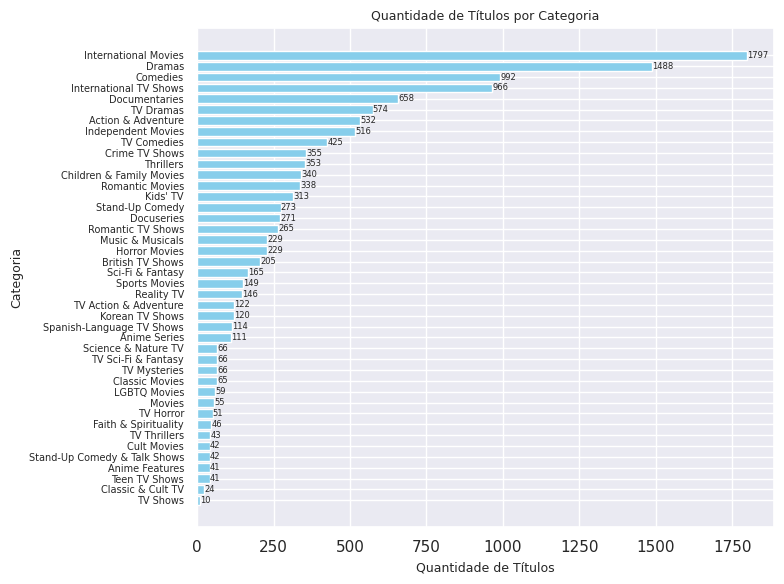

In [47]:
#gráfico de barras

import matplotlib.pyplot as plt


# separando as categorias por vírgula e contar a frequência de cada uma
categorias = df['listed_in'].str.split(', ', expand=True).stack() # split- separa em colunas usando o delimitador "," stack - irá empilhar essas colunas verticalmente. Isso facilitará a contagem
contagem_categorias = categorias.value_counts()

# Converter a série de contagem em um DataFrame para facilitar a visualização
df_contagem = contagem_categorias.reset_index()
df_contagem.columns = ['Categoria', 'Quantidade']
df_contagem = df_contagem.sort_values(by='Quantidade', ascending=True)

# criando o gráfico de barras
plt.figure(figsize=(8, 6))

#  definindo características das barras
bars = plt.barh(df_contagem['Categoria'], df_contagem['Quantidade'], color='skyblue')

# adicionando rótulos nos eixos e título
plt.xlabel("Quantidade de Títulos", fontsize=9)
plt.ylabel("Categoria", fontsize=9)
plt.title("Quantidade de Títulos por Categoria", fontsize=9)
plt.yticks(fontsize=7)

# adicionando os valores nas barras
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.5, bar.get_y() + bar.get_height()/2, round(xval, 1), ha='left', va='center', fontsize=6)

# Ajusta o layout para evitar que rótulos sejam cortados
plt.tight_layout()

# Exibir gráfico
plt.show()

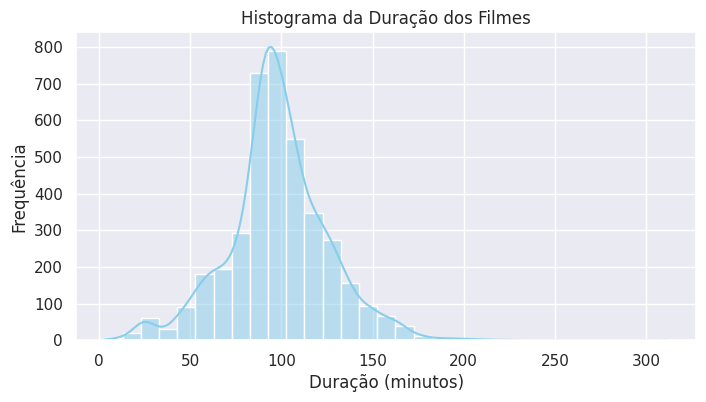

In [49]:
# Hitograma

import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 4)  #definindo o tamanho da figura através do dicionário global do Matplotlib
sns.set_theme() # configurando o tema visual dos gráficos gerados pelo Seaborn

# filtrando dataframe com type = movie
movies_df = df[df['type'] == 'Movie'].copy()

# Converter a coluna 'duration' para numérica (se estiver em formato de string)
movies_df['duration'] = movies_df['duration'].str.extract('(\d+)').astype(float)

# Criar o histograma
plt.figure()
sns.histplot(data=movies_df, x='duration', kde=True, binwidth=10, color='skyblue')
plt.title('Histograma da Duração dos Filmes')
plt.xlabel('Duração (minutos)')
plt.ylabel('Frequência')
plt.show()


## Etapa 6: Atividade extra

*   Quais são os 5 países que possuem mais produções no catálogo?


In [ ]:
# Substituir valores nulos por 'Desconhecido' para evitar erros
df['country'] = df['country'].fillna('Desconhecido')

# Contar a frequência de produções por país
top_paises = df['country'].value_counts().head(5)

# Exibir o resultado
print(top_paises)

country
United States     1907
India              697
Desconhecido       427
United Kingdom     336
Japan              168
Name: count, dtype: int64
